In [1]:
import pandas as pd
import os

# --- CONFIGURATION ---
INPUT_FILE = "/data/users_data/mli13/LLMvalidationAD112025/result112025/realtime_summary_analysis.csv"
OUTPUT_FILE = "/data/users_data/mli13/LLMvalidationAD112025/result112025/final_criteria_classification.csv"

In [2]:
def apply_classifications(df):
    # 1. Calculate Rates (R_p, R_u, R_n)
    # Ensure we use the actual analyzed count to avoid division by zero
    df['Total_Analyzed'] = df['Positive'] + df['Neutral'] + df['Negative']
    
    # Calculate percentages (0.0 to 1.0)
    df['Rate_Positive'] = df['Positive'] / df['Total_Analyzed']
    df['Rate_Neutral'] = df['Neutral'] / df['Total_Analyzed']
    df['Rate_Negative'] = df['Negative'] / df['Total_Analyzed']

    # Handle potentially empty rows (div by zero)
    df[['Rate_Positive', 'Rate_Neutral', 'Rate_Negative']] = df[['Rate_Positive', 'Rate_Neutral', 'Rate_Negative']].fillna(0)

    # 2. Apply Criterion 1
    # Logic based on image:
    # - Neutral Relation if Ru >= 0.99
    # - Potentially Therapeutic if Ru < 0.99 AND Rp >= Rn
    # - Potentially Adverse Effect if Ru < 0.99 AND Rn >= Rp (Note: If Rp == Rn, priority goes to Therapeutic based on standard logic order)
    
    def criterion_1(row):
        r_u = row['Rate_Neutral']
        r_p = row['Rate_Positive']
        r_n = row['Rate_Negative']
        
        if r_u >= 0.99:
            return "Neutral Relation"
        elif r_p >= r_n:
            return "Potentially Therapeutic"
        else: #  r_n > r_p 
            return "Potentially Adverse Effect"

    df['Criterion_1'] = df.apply(criterion_1, axis=1)

    # 3. Apply Criterion 2
    # Logic based on image:
    # - Potentially Therapeutic if Rp > 0
    # - No Positive Sign otherwise
    
    def criterion_2(row):
        if row['Rate_Positive'] > 0:
            return "Potentially Therapeutic"
        else:
            return "No Positive Sign"

    df['Criterion_2'] = df.apply(criterion_2, axis=1)

    return df



In [3]:
# --- EXECUTION ---
if __name__ == "__main__":
    if os.path.exists(INPUT_FILE):
        print(f"Loading data from {INPUT_FILE}...")
        df = pd.read_csv(INPUT_FILE)
        
        # Apply logic
        df_processed = apply_classifications(df)
        
        # Format percentages for readability (optional, but nice for Excel)
        df['Display_Rate_Pos'] = (df['Rate_Positive'] * 100).map('{:.1f}%'.format)
        df['Display_Rate_Neu'] = (df['Rate_Neutral'] * 100).map('{:.1f}%'.format)
        df['Display_Rate_Neg'] = (df['Rate_Negative'] * 100).map('{:.1f}%'.format)

        # Save to new file
        df_processed.to_csv(OUTPUT_FILE, index=False)
        print(f"Success! Classification completed.")
        print(f"Results saved to: {OUTPUT_FILE}")
        
        # Preview results
        print("\nSample Results:")
        print(df_processed[['Drug_name', 'Rate_Positive', 'Rate_Neutral', 'Rate_Negative', 'Criterion_1', 'Criterion_2']].head(10))
    else:
        print(f"Error: Input file not found at {INPUT_FILE}")

Loading data from /data/users_data/mli13/LLMvalidationAD112025/result112025/realtime_summary_analysis.csv...
Success! Classification completed.
Results saved to: /data/users_data/mli13/LLMvalidationAD112025/result112025/final_criteria_classification.csv

Sample Results:
              Drug_name  Rate_Positive  Rate_Neutral  Rate_Negative  \
0            Adalimumab       0.000000      1.000000       0.000000   
1  Adenosine phosphate        0.000000      1.000000       0.000000   
2            Alirocumab       0.000000      0.500000       0.500000   
3           Apomorphine       0.111111      0.888889       0.000000   
4             Aprotinin       0.000000      1.000000       0.000000   
5          Benzatropine       0.000000      0.500000       0.500000   
6      Benzylpenicillin       0.000000      1.000000       0.000000   
7         Betamethasone       0.000000      0.750000       0.250000   
8         Carbamazepine       0.153846      0.820513       0.025641   
9           Carmust

In [ ]:
#get descriptive analysis and histogram

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Total rows in file: 290
Rows after filtering for 'Alzheimer': 62
------------------------------
Analysis for 62 Alzheimer's Drugs
------------------------------
Mean (Average):   37.58
Median (Middle):  7.50
SD (Variation):   63.47
Skewness:         1.93
Range:            1 - 200
------------------------------


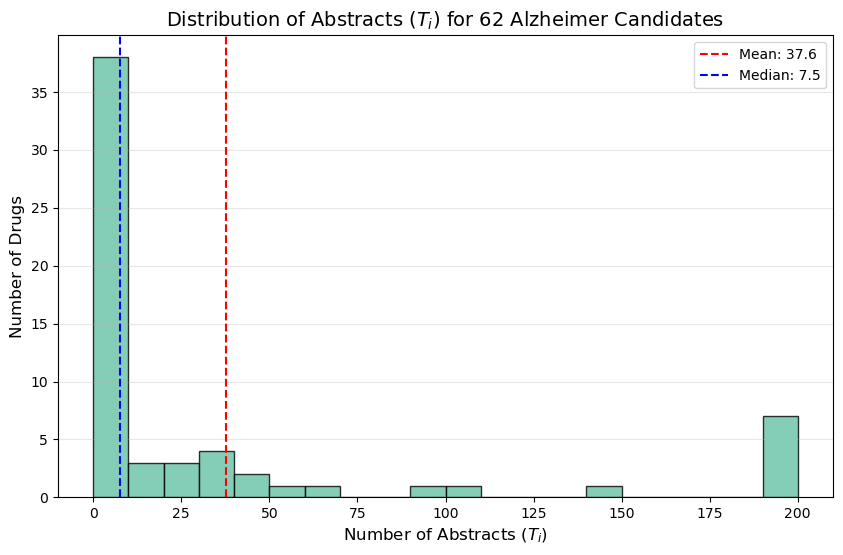

Histogram saved as 'Ti_Distribution_Alzheimer.png'


In [12]:


# 1. Load the Data
file_path = './result112025/realtime_summary_analysis.csv' 

try:
    # Try reading as standard CSV
    df = pd.read_csv(file_path)
except:
    # Fallback: if it's tab-separated
    df = pd.read_csv(file_path, sep='\t')

# 2. Filter for Alzheimer's rows only
# We convert to string to handle potential formatting issues and use case=False for safety
df_filtered = df[df['Disease_ID'].astype(str).str.contains("28780", case=False, na=False)]

print(f"Total rows in file: {len(df)}")
print(f"Rows after filtering for 'Alzheimer': {len(df_filtered)}")

# 3. Calculate Statistics
col_name = 'Total_Abstracts'

if col_name in df_filtered.columns:
    data = df_filtered[col_name]
    
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    skew_val = data.skew()
    min_val = data.min()
    max_val = data.max()
    count = len(data)

    print("-" * 30)
    print(f"Analysis for {count} Alzheimer's Drugs")
    print("-" * 30)
    print(f"Mean (Average):   {mean_val:.2f}")
    print(f"Median (Middle):  {median_val:.2f}")
    print(f"SD (Variation):   {std_val:.2f}")
    print(f"Skewness:         {skew_val:.2f}")
    print(f"Range:            {min_val} - {max_val}")
    print("-" * 30)

    # 4. Generate Histogram
    plt.figure(figsize=(10, 6))
    
    # Bins: 0 to 220, steps of 10
    bins = range(0, 201, 10) 
    
    plt.hist(data, bins=bins, color='#66c2a5', edgecolor='black', alpha=0.8)
    
    # Add vertical lines for Mean and Median
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.1f}')
    plt.axvline(median_val, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.1f}')
    
    plt.title(f'Distribution of Abstracts ($T_i$) for {count} Alzheimer Candidates', fontsize=14)
    plt.xlabel('Number of Abstracts ($T_i$)', fontsize=12)
    plt.ylabel('Number of Drugs', fontsize=12)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    
    # Save the figure
    plt.savefig('Ti_Distribution_Alzheimer.png', dpi=300)
    plt.show()
    
    print("Histogram saved as 'Ti_Distribution_Alzheimer.png'")
    
else:
    print(f"Error: Column '{col_name}' not found. Available columns: {list(df_filtered.columns)}")